## 1. Part 1 (Microfinance RCT)

In [1]:
import pandas as pd

In [2]:
df = pd.read_stata('data.dta')
print(df.head())

   hhid  areaid  treatment  old_biz any_old_biz  area_pop_base  \
0     1       1  Treatment      0.0          No            272   
1     2       1  Treatment      0.0          No            272   
2     3       1  Treatment      1.0         Yes            272   
3     4       1  Treatment      1.0         Yes            272   
4     5       1  Treatment      1.0         Yes            272   

   area_debt_total_base  area_business_total_base  area_exp_pc_mean_base  \
0               81050.0                        11            1334.766113   
1               81050.0                        11            1334.766113   
2               81050.0                        11            1334.766113   
3               81050.0                        11            1334.766113   
4               81050.0                        11            1334.766113   

   area_literate_head_base  ...  women_emp_index  female_biz_pct  \
0                      0.5  ...        -0.415386             NaN   
1         

In [10]:
df.shape

(6863, 97)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   hhid                      6863 non-null   int16   
 1   areaid                    6863 non-null   int16   
 2   treatment                 6863 non-null   category
 3   old_biz                   6762 non-null   float64 
 4   any_old_biz               6739 non-null   category
 5   area_pop_base             6863 non-null   int16   
 6   area_debt_total_base      6863 non-null   float64 
 7   area_business_total_base  6863 non-null   int8    
 8   area_exp_pc_mean_base     6863 non-null   float32 
 9   area_literate_head_base   6863 non-null   float32 
 10  area_literate_base        6863 non-null   float32 
 11  visitday                  6851 non-null   float64 
 12  visitmonth                6863 non-null   int8    
 13  visityear                 6863 non-null   int16 

In [ ]:
df['treatment'].value_counts()

treatment
Treatment    3599
Control      3264
Name: count, dtype: int64

In [12]:
# Conduct RCT on microcredit in the study "The Miracle of Microfinance? Evidence from a Randomized Evaluation" by Banerjee et al.
# 52 out of 104 villages were randomly assigned to receive microcredit

# The dataset contains information on households in villages, including whether they received microcredit, their consumption levels, and other demographic variables.

# Model this problem using random variables to understand the causal relationship. What are the observed outcome (𝑌 𝑖), treatment (𝐷𝑖) and potential outcomes (𝑌 0𝑖, 𝑌 1𝑖)
# Observed outcome (𝑌 𝑖): Household consumption levels
# Treatment (𝐷𝑖): Whether the household received microcredit (1 if received, 0 otherwise)
# Potential outcomes (𝑌 0𝑖, 𝑌 1𝑖): Household consumption levels without and with microcredit, respectively

### 1.1 Part (a) Model Setup

In [13]:
"""
Define random variables:
Yi  = observed outcome (e.g., business profit, consumption, etc.)
Di  = treatment indicator (1 if Spandana branch available, 0 if not)
Y1i = potential outcome if treated
Y0i = potential outcome if not treated

Causal Model:
Yi = Di * Y1i + (1 - Di) * Y0i
ATE = E[Y1i - Y0i]

Because assignment is randomized:
Di ⫫ (Y1i, Y0i)
=> unbiased estimation of ATE by comparing means between treatment and control.
"""


'\nDefine random variables:\nYi  = observed outcome (e.g., business profit, consumption, etc.)\nDi  = treatment indicator (1 if Spandana branch available, 0 if not)\nY1i = potential outcome if treated\nY0i = potential outcome if not treated\n\nCausal Model:\nYi = Di * Y1i + (1 - Di) * Y0i\nATE = E[Y1i - Y0i]\n\nBecause assignment is randomized:\nDi ⫫ (Y1i, Y0i)\n=> unbiased estimation of ATE by comparing means between treatment and control.\n'

In [ ]:
# First of all, we can model the problem using random variables as follows:
# Let Y_i be the observed outcome (e.g., household consumption, business profit, etc.)
# Let D_i be the treatment indicator (1 if household received microcredit, 0 otherwise)
# Let Y_1i be the potential outcome if treated (household consumption if received microcredit)
# Let Y_0i be the potential outcome if not treated (household consumption if not received microcredit)

# As we checked the dataset, the treatment variable can be checked using .value_counts() function, which shows the number of households that received microcredit (treatment group) and those that did not (control group).
# The results show that 3599 were treated (received microcredit) and 3264 were not treated (did not receive microcredit).


# The causal model can be represented as:
# Y_i = D_i * Y_1i + (1 - D_i) * Y_0i
# The average treatment effect (ATE) can be estimated as:
# ATE = E[Y_1i - Y_0i]
# Since the assignment of treatment is randomized, we can assume that:
# D_i ⫫ (Y_1i, Y_0i)
# This allows us to estimate the ATE by comparing the means of the observed outcomes between the treatment and control groups.
# To estimate the average treatment effect (ATE) of microcredit on household consumption, we can compare the mean consumption levels between the treatment and control groups.

### 1.2 Part (b) Balance Test on Household Characteristics

In [15]:
df['treatment'].value_counts()

treatment
Treatment    3599
Control      3264
Name: count, dtype: int64

In [16]:
# Treatment / Control -> chance to 1 / 0
df['treatment'] = df['treatment'].replace({'Treatment': 1, 'Control': 0})

# Check
df['treatment'].value_counts()

/var/folders/gx/_f61ngf91hq2y51c1jv2qkkr0000gn/T/ipykernel_31937/1067013594.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['treatment'] = df['treatment'].replace({'Treatment': 1, 'Control': 0})
/var/folders/gx/_f61ngf91hq2y51c1jv2qkkr0000gn/T/ipykernel_31937/1067013594.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['treatment'] = df['treatment'].replace({'Treatment': 1, 'Control': 0})


treatment
1    3599
0    3264
Name: count, dtype: int64

In [17]:
# Step 2: Balance test function 정의
from scipy.stats import ttest_ind
import pandas as pd

def balance_test(df, var_list):
    results = []
    for var in var_list:
        mean_treat = df.loc[df['treatment']==1, var].mean()
        mean_control = df.loc[df['treatment']==0, var].mean()
        t, p = ttest_ind(
            df.loc[df['treatment']==1, var],
            df.loc[df['treatment']==0, var],
            nan_policy='omit'
        )
        results.append([var, mean_treat, mean_control, mean_treat - mean_control, p])
    table = pd.DataFrame(results, columns=['Variable','Mean(Treated)','Mean(Control)','Difference','p-value'])
    return table

In [20]:
# Step 3: household characteristic 변수 목록
household_vars = ['hhsize', 'adults', 'children', 'male_head', 'head_age', 'head_noeduc']

# Step 4: 실제 실행
balance_household = balance_test(df, household_vars)
balance_household

# The results indicate that there are no significant differences in household characteristics between the treatment and control groups, suggesting that the randomization was successful.

,Variable,Mean(Treated),Mean(Control),Difference,p-value
0,hhsize,5.617009,5.645221,-0.028211,0.585934
1,adults,3.868816,3.886642,-0.017826,0.672320
2,children,1.724013,1.737745,-0.013732,0.664773
3,male_head,0.906407,0.894511,0.011896,0.100080
4,head_age,40.914015,41.148910,-0.234896,0.346930
5,head_noeduc,0.311558,0.311425,0.000133,0.990558


### 1.3 Part (c) Does access to microfinance cause 1) more credit? 2) more business activity?

#### 1) Credit

In [23]:
credit_bin = ['spandana', 'othermfi', 'anybank', 'anyinformal', 'anyloan']
credit_amt = ['spandana_amt', 'othermfi_amt', 'bank_amt', 'informal_amt', 'anyloan_amt']

credit_vars = credit_bin + credit_amt

In [27]:
df[credit_vars].head()

,spandana,othermfi,anybank,anyinformal,anyloan,spandana_amt,othermfi_amt,bank_amt,informal_amt,anyloan_amt
0,Yes,No,No,Yes,Yes,18000.0,0.0,0.0,93540.0,115780.0
1,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0
2,No,No,No,Yes,No,0.0,0.0,0.0,60000.0,0.0
3,No,No,No,Yes,Yes,0.0,0.0,0.0,60000.0,51700.0
4,No,No,No,No,Yes,0.0,0.0,0.0,0.0,23000.0


In [32]:
# --- Step C-2: "Yes"/"No" -> 1/0 변환 ---
def to_binary01(s):
    if pd.api.types.is_numeric_dtype(s):
        return s.astype(float)
    s = s.astype(str).str.strip().str.lower()
    s = s.replace({
        'Yes': 1, 'No': 0
    })
    return pd.to_numeric(s, errors='coerce').astype(float)

credit_bin = ['spandana','othermfi','anybank','anyinformal','anyloan']

for col in credit_bin:
    if col in df.columns:
        df[col] = to_binary01(df[col])

In [33]:
df[credit_vars].head()

,spandana,othermfi,anybank,anyinformal,anyloan,spandana_amt,othermfi_amt,bank_amt,informal_amt,anyloan_amt
0,1.0,0.0,0.0,1.0,1.0,18000.0,0.0,0.0,93540.0,115780.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,60000.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,60000.0,51700.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23000.0


In [41]:
# Check balance test for credit variables

balance_credit = balance_test(df, credit_vars)
pd.set_option('display.float_format', '{:.4f}'.format)


# want to order by p-value
balance_credit = balance_credit.sort_values('p-value')
balance_credit

,Variable,Mean(Treated),Mean(Control),Difference,p-value
0,spandana,0.2059,0.0505,0.1554,0.0000
5,spandana_amt,2229.9736,597.4407,1632.5329,0.0000
3,anyinformal,0.7088,0.7610,-0.0523,0.0000
4,anyloan,0.8488,0.8673,-0.0185,0.0282
1,othermfi,0.1364,0.1486,-0.0122,0.1560
9,anyloan_amt,64082.5183,59836.2650,4246.2533,0.3111
6,othermfi_amt,1701.3093,1806.0256,-104.7163,0.4415
2,anybank,0.0839,0.0791,0.0047,0.4751
7,bank_amt,9058.6372,8422.4306,636.2067,0.7524
8,informal_amt,40434.4961,41044.6211,-610.1250,0.7721


In [37]:
# This suggests that access to microfinance does not lead to significant differences in credit uptake or amounts borrowed between treatment and control groups.
# However, the treatment group does show slightly higher average amounts of Spandan borrowings,indicating that access to microfinance may encourage households to borrow more from the microfinance institution itself.

# At the same time, borrowing from informal sources appears slightly lower in the treatment group, which could suggest a substitution effect where households rely less on informal loans when they have access to microfinance.

#### 2) Business activity

In [43]:
business_vars = ['bizassets','bizinvestment','bizrev','bizexpense','bizprofit']

balance_business = balance_test(df, business_vars)
balance_business


,Variable,Mean(Treated),Mean(Control),Difference,p-value
0,bizassets,3183.9753,2497.5491,686.4263,0.0322
1,bizinvestment,657.8538,280.0687,377.7851,0.0596
2,bizrev,5476.0093,4856.3799,619.6294,0.4355
3,bizexpense,4235.6802,4055.4453,180.2349,0.7945
4,bizprofit,1171.0315,744.8980,426.1335,0.1558


In [44]:
# This suggests that access to microfinance and the relationship with business activity is not significantly different between treatment and control groups.

### 1.4 Part (d) More consumption? More self-employment activity?

#### 1) More consumption?

In [46]:
# Step D-1: 소비 관련 변수 존재 여부 확인
consumption_vars = ['total_exp_mo','nondurable_exp_mo','durables_exp_mo','home_durable_index']

balance_consumption = balance_test(df, consumption_vars)
balance_consumption

,Variable,Mean(Treated),Mean(Control),Difference,p-value
0,total_exp_mo,6482.3457,6375.2388,107.1069,0.3971
1,nondurable_exp_mo,5847.5938,5831.3086,16.2852,0.8786
2,durables_exp_mo,653.2581,550.7856,102.4725,0.0485
3,home_durable_index,2.3594,2.3712,-0.0119,0.5718


#### 2) More self-employment activity?

In [47]:
self_emp_vars = ['total_biz','female_biz','female_biz_pct','bizemployees','hours_week_biz']

balance_selfemp = balance_test(df, self_emp_vars)
balance_selfemp

,Variable,Mean(Treated),Mean(Control),Difference,p-value
0,total_biz,0.5224,0.5028,0.0196,0.3444
1,female_biz,0.2043,0.1854,0.0189,0.1323
2,female_biz_pct,0.3778,0.3749,0.0029,0.8761
3,bizemployees,0.1196,0.1306,-0.0110,0.6141
4,hours_week_biz,37.2564,34.3817,2.8747,0.0590


### 1.5 Part (e) Does access to microfinance increase economic activities?
### What would be the explanation if it is counterintuitive?

In [48]:
# Does access to microfinance increase economic activities?
# What would be the explanation if it is counterintuitive?

# One possible explanation could be that access to microfinance may lead to increased financial stress for some individuals, as they take on debt with the expectation of future earnings that do not materialize. This could result in a decrease in overall economic activity, as individuals may prioritize debt repayment over consumption or investment in their businesses.

## 2. Part 2 (MRK - market model regression)

In [ ]:
# This file contains data for MRK and a few other pharmaceutical companies
# All data are daily returns
# estimate a market model regression (𝑅𝑖𝑡 = ̃𝛼𝑖 + 𝛽𝑖𝑅𝑚𝑡 + 𝜀̃𝑖𝑡) for a sample of stocks
# One month equals 21 trading days and one year equals 250 trading days

### Part a)

In [52]:
df2 = pd.read_excel('Problem Set 1 - Firms.xls')

In [53]:
df2.head()

,"Simple Daily Returns (In Percent) for Five Pharmaceutical Companies, Ford Motor Company (F), and a Proxy for the Market",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,The time period is Jan 1994 - Dec 2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Part d)

In [72]:
df4 = pd.read_excel('stock_ps1.xlsx')
df4.head()

,Date,BMY,PFE,JNJ,MRK,LLY,F,Market
0,19940103,-0.0003,-0.0145,0.0084,0.0255,0.0000,-0.0174,-0.0037
1,19940104,0.0217,0.0037,-0.0028,0.0213,-0.0042,0.0079,0.0028
2,19940105,0.0128,0.0073,-0.0028,0.0347,-0.0085,-0.0020,0.0024
3,19940106,-0.0084,-0.0073,-0.0194,-0.0168,-0.0085,-0.0020,-0.0006
4,19940107,-0.0042,0.0000,0.0113,0.0137,0.0022,0.0157,0.0047


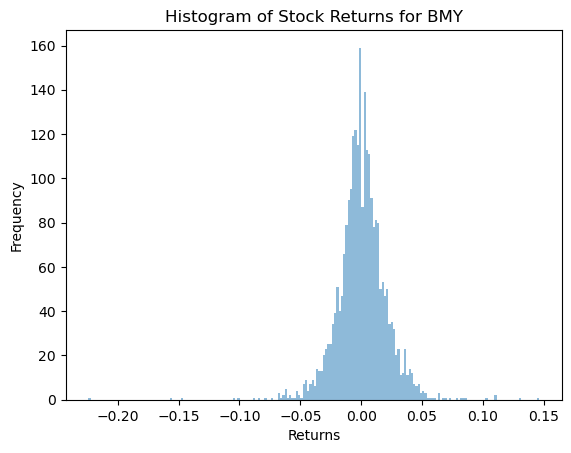

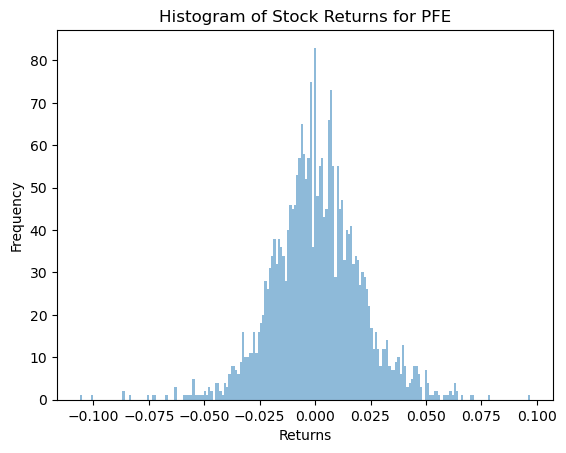

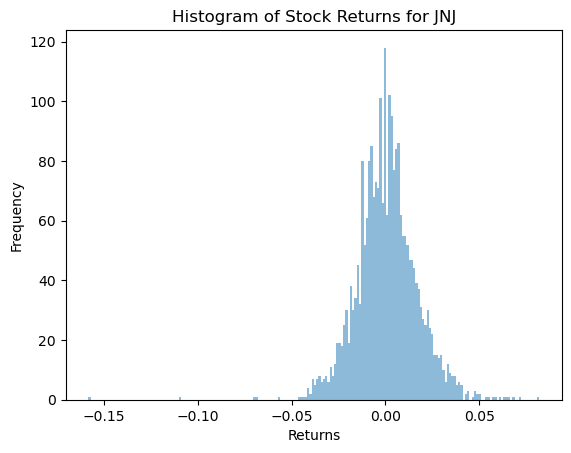

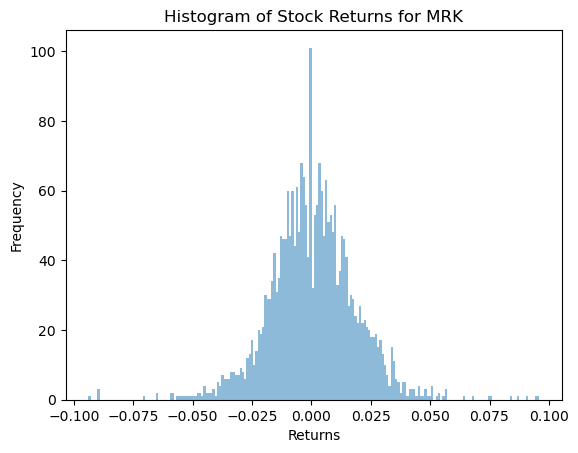

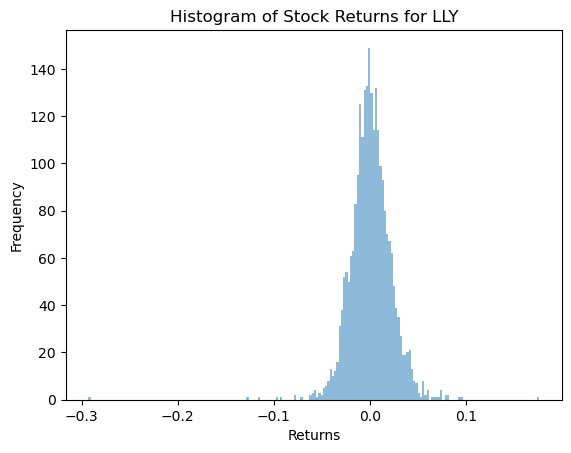

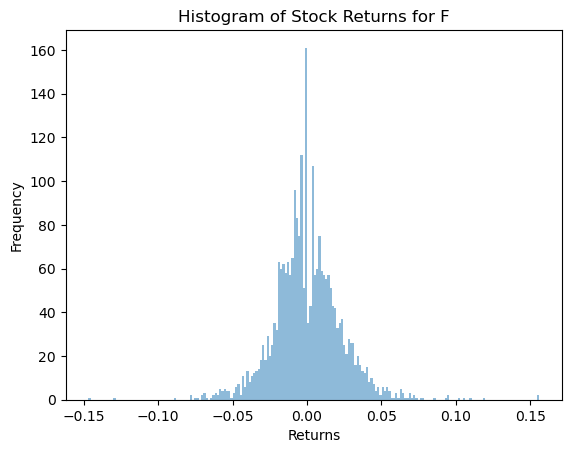

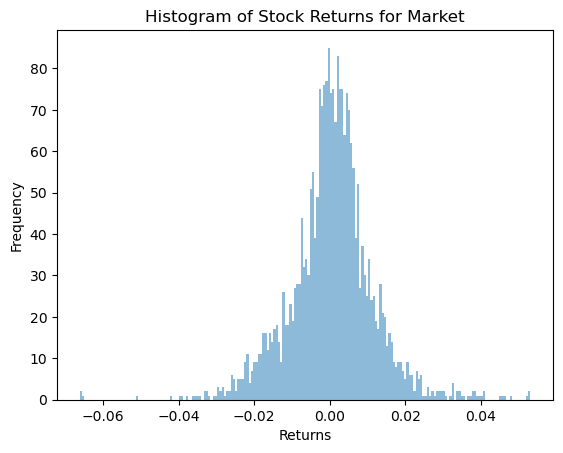

In [77]:
# draw histograms of the stock returns for each stock individually
import matplotlib.pyplot as plt

# label each histogram with the stock ticker symbol
for column in df4.columns[1:]:
    plt.hist(df4[column], bins=200, alpha=0.5, label=column)
    plt.title(f'Histogram of Stock Returns for {column}')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.show()

In [63]:
df3 = pd.read_excel('error_ps1.xlsx')
df3.head()

,BMY,PFE,JNJ,MRK,LLY,F
0,0.0023,-0.0122,0.0100,0.0277,0.0021,-0.0138
1,0.0193,0.0008,-0.0049,0.0190,-0.0068,0.0051
2,0.0107,0.0048,-0.0047,0.0327,-0.0108,-0.0043
3,-0.0082,-0.0074,-0.0196,-0.0167,-0.0087,-0.0014
4,-0.0081,-0.0043,0.0081,0.0100,-0.0018,0.0111


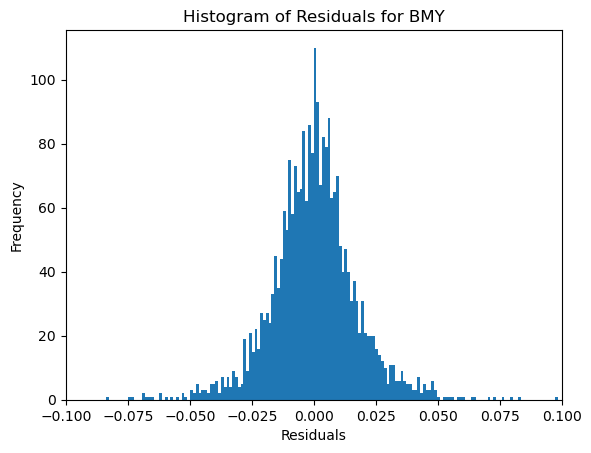

In [64]:
# from df3, draw a histogram of the residuals for BMY
import matplotlib.pyplot as plt

plt.hist(df3['BMY'], bins=300)
plt.xlim(-0.1, 0.1)
plt.title('Histogram of Residuals for BMY')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

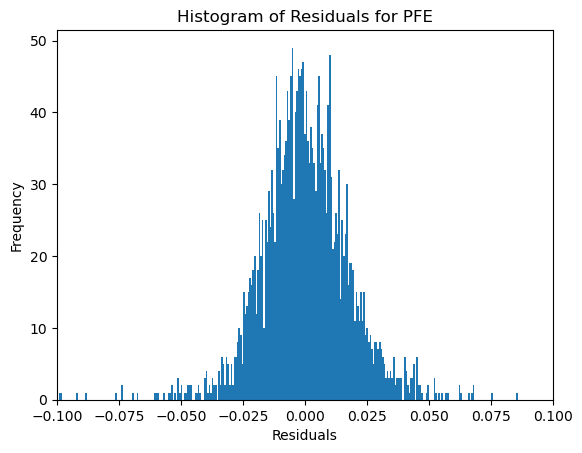

In [67]:
plt.hist(df3['PFE'], bins=300)
plt.xlim(-0.1, 0.1)
plt.title('Histogram of Residuals for PFE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

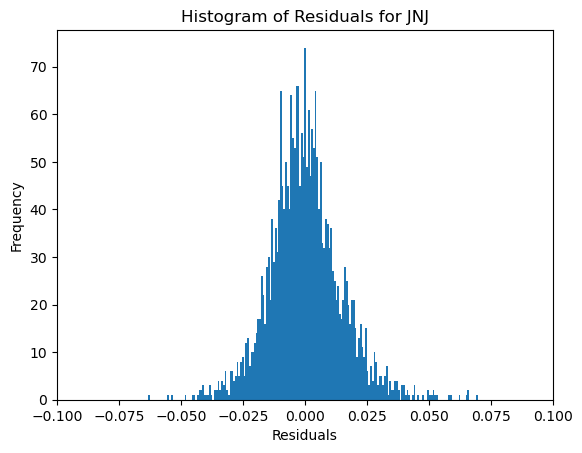

In [68]:
plt.hist(df3['JNJ'], bins=300)
plt.xlim(-0.1, 0.1)
plt.title('Histogram of Residuals for JNJ')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

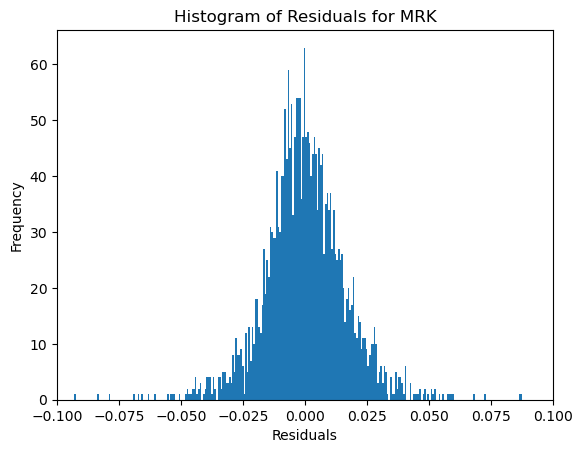

In [69]:
plt.hist(df3['MRK'], bins=300)
plt.xlim(-0.1, 0.1)
plt.title('Histogram of Residuals for MRK')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

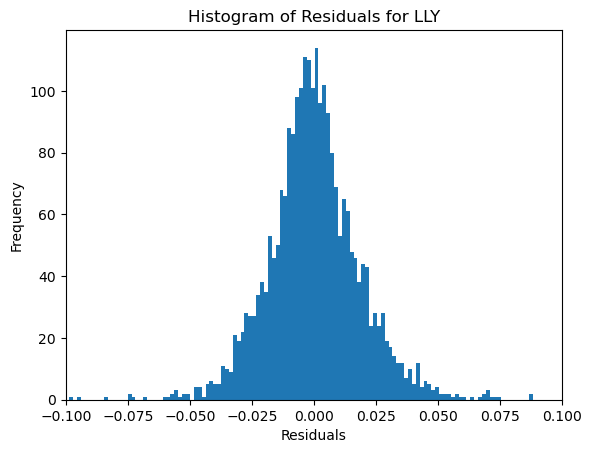

In [70]:
plt.hist(df3['LLY'], bins=300)
plt.xlim(-0.1, 0.1)
plt.title('Histogram of Residuals for LLY')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

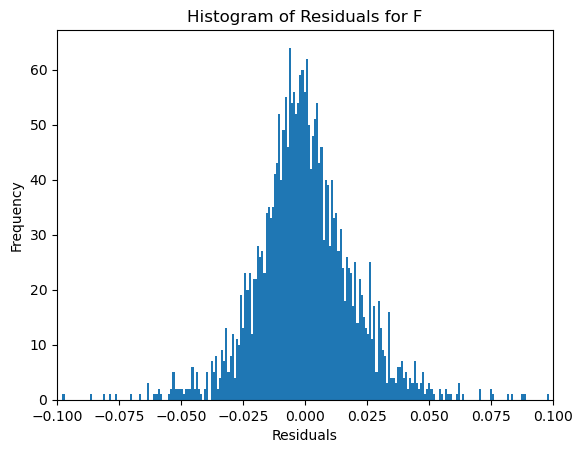

In [71]:
plt.hist(df3['F'], bins=300)
plt.xlim(-0.1, 0.1)
plt.title('Histogram of Residuals for F')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df4['Date'] = pd.to_datetime(df4['Date'], format='%Y%m%d')
df4 = df4.set_index('Date').sort_index()

df_weekly = (1 + df4).resample('W').prod() - 1   # 주 단위 누적 수익률

# 월간(monthly) 수익률 계산
df_monthly = (1 + df4).resample('M').prod() - 1  # 월 단위 누적 수익률

# 결과 확인
print(df_weekly.head())
print(df_monthly.head())

               BMY     PFE     JNJ     MRK     LLY       F  Market
Date                                                              
1994-01-09  0.0214 -0.0109 -0.0056  0.0800 -0.0189  0.0019  0.0055
1994-01-16 -0.0085 -0.0092 -0.0196 -0.0168  0.0129  0.0561  0.0108
1994-01-23  0.0064 -0.0647 -0.0429 -0.0377  0.0191 -0.0110  0.0003
1994-01-30 -0.0085  0.0099  0.0149  0.0249 -0.0062 -0.0274  0.0086
1994-02-06 -0.0280 -0.0294 -0.0118 -0.0243 -0.0084  0.0421 -0.0170
               BMY     PFE     JNJ     MRK     LLY       F  Market
Date                                                              
1994-01-31  0.0062 -0.0634 -0.0557  0.0618  0.0084  0.0451  0.0315
1994-02-28 -0.0454 -0.0957 -0.0472 -0.1130 -0.0651 -0.0728 -0.0239
1994-03-31 -0.0548 -0.0690 -0.0592 -0.0730 -0.0993 -0.0543 -0.0460
1994-04-30  0.0461  0.0926  0.0960 -0.0042 -0.0125  0.0013  0.0094
1994-05-31  0.0139  0.0890  0.0768  0.0295  0.1761 -0.0107  0.0100


/var/folders/gx/_f61ngf91hq2y51c1jv2qkkr0000gn/T/ipykernel_31937/2961240107.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = (1 + df4).resample('M').prod() - 1  # 월 단위 누적 수익률


"\n# --- 주간(5거래일) 수익률 계산 ---\ndf4['MRK_weekly'] = (1 + df4['MRK']).rolling(window=5).apply(lambda x: x.prod() - 1)\ndf4['Market_weekly'] = (1 + df4['Market']).rolling(window=5).apply(lambda x: x.prod() - 1)\n\n# --- 월간(21거래일) 수익률 계산 ---\ndf4['MRK_monthly'] = (1 + df4['MRK']).rolling(window=21).apply(lambda x: x.prod() - 1)\ndf4['Market_monthly'] = (1 + df4['Market']).rolling(window=21).apply(lambda x: x.prod() - 1)\n\n# 결과 확인\nprint(df4[['date', 'MRK', 'MRK_weekly', 'MRK_monthly']].tail(10))\n"

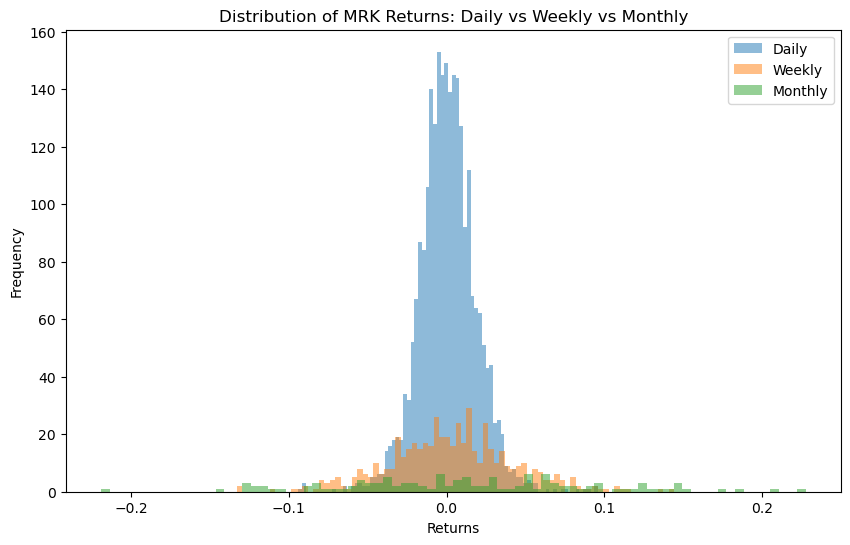

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df4['MRK'].dropna(), bins=80, alpha=0.5, label='Daily')
plt.hist(df_weekly['MRK'].dropna(), bins=80, alpha=0.5, label='Weekly')
plt.hist(df_monthly['MRK'].dropna(), bins=80, alpha=0.5, label='Monthly')
plt.title('Distribution of MRK Returns: Daily vs Weekly vs Monthly')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()


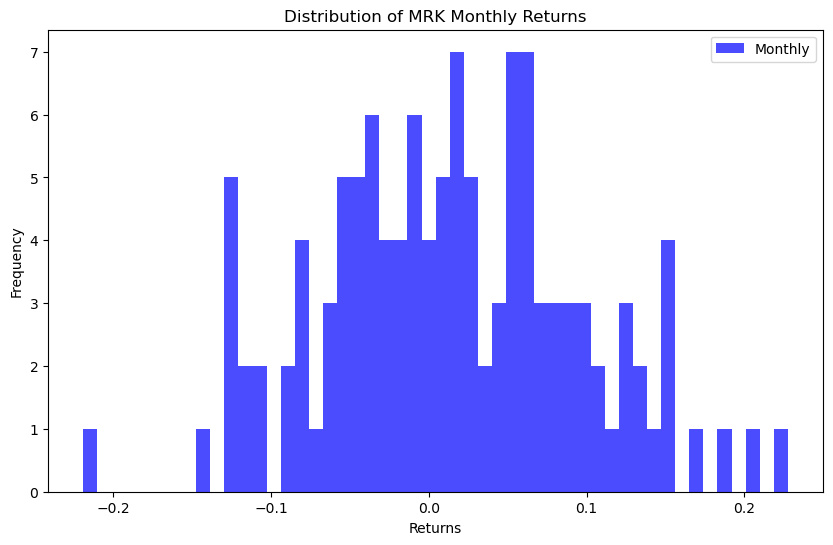

In [95]:
# show only the monthly histogram for MRK
plt.figure(figsize=(10,6))
plt.hist(df_monthly['MRK'].dropna(), bins=50, alpha=0.7, color='blue', label='Monthly')
plt.title('Distribution of MRK Monthly Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

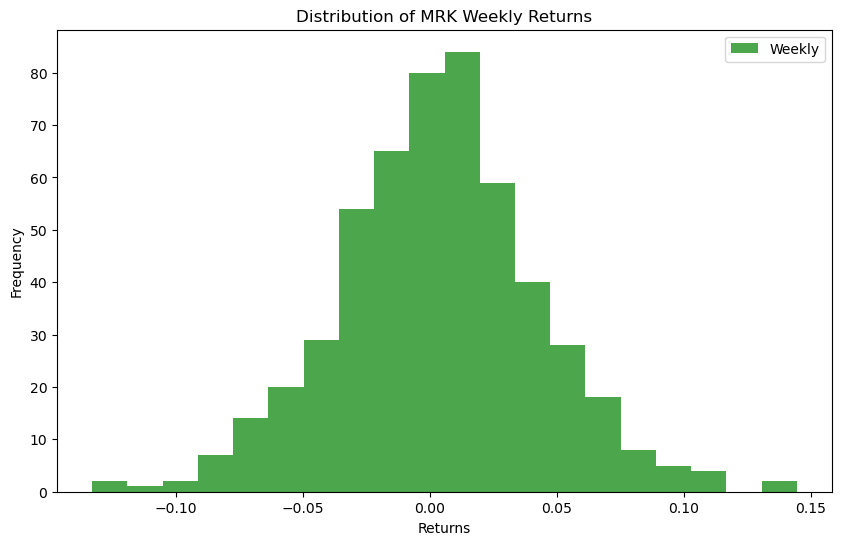

In [92]:
# show only the weekly histogram for MRK

plt.figure(figsize=(10,6))
plt.hist(df_weekly['MRK'].dropna(), bins=20, alpha=0.7, color='green', label='Weekly')
plt.title('Distribution of MRK Weekly Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()